In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import sys

In [3]:
# import all the spreadsheets

df_season1617=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2016-17.csv')
df_season1516_Championship=pd.read_csv('C:/Users/Thoma/OneDrive/Desktop/EnglishDatasets/2015-16C.csv')


In [4]:
#all columns in each spreadsheet
df_season1516_Championship.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [6]:
# brings the home and away data for the promoted teams

df_Burnley_home= df_season1516_Championship[df_season1516_Championship['HomeTeam']=='Burnley']
df_Burnley_away= df_season1516_Championship[df_season1516_Championship['AwayTeam']=='Burnley']
df_Middlesbrough_home= df_season1516_Championship[df_season1516_Championship['HomeTeam']=='Middlesbrough']
df_Middlesbrough_away= df_season1516_Championship[df_season1516_Championship['AwayTeam']=='Middlesbrough']
df_Hull_home= df_season1516_Championship[df_season1516_Championship['HomeTeam']=='Hull']
df_Hull_away= df_season1516_Championship[df_season1516_Championship['AwayTeam']=='Hull']

df_season1516_Championship = pd.concat([df_Burnley_home, df_Burnley_away], axis =0)
df_season1516_Championship = pd.concat([df_Middlesbrough_home, df_Middlesbrough_away], axis =0)
df_season1516_Championship = pd.concat([df_Hull_home, df_Hull_away], axis =0)

In [10]:
# add the games from the lower league to the top league

df_season1617= pd.concat([df_season1617,df_season1516_Championship], axis=0)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


(65,)

In [30]:
teams_s1617 = df_season1617.columns.unique()

In [31]:
teams_s1617.shape

(65,)

(65,)

In [12]:
# combine all seasons

df_all_seasons = df_season1617

In [13]:
#converts the date column from string to datetime

df_all_seasons['Date'] = pd.to_datetime(df_all_seasons['Date'], errors='coerce')

In [14]:
# splits up the date column into three seperate columns

df_all_seasons['Day'] = df_all_seasons['Date'].dt.day
df_all_seasons['Month'] = df_all_seasons['Date'].dt.month
df_all_seasons['Year'] = df_all_seasons['Date'].dt.year

In [15]:
# takes the main columns to be used in the prediction

df_all_seasons_principles = df_all_seasons[['Day','Month','Year','HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST']]

In [16]:
# creates two new columns for home team and away team goal difference

df_all_seasons_principles['HTGDIFF'] = df_all_seasons_principles['FTHG'] - df_all_seasons_principles['FTAG']
df_all_seasons_principles['ATGDIFF'] = df_all_seasons_principles['FTAG'] - df_all_seasons_principles['FTHG']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [17]:
df_all_seasons_principles.head()

,Day,Month,Year,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
0,13,8,2016,Burnley,Swansea,0,1,3,9,-1,1
1,13,8,2016,Crystal Palace,West Brom,0,1,4,3,-1,1
2,13,8,2016,Everton,Tottenham,1,1,6,4,0,0
3,13,8,2016,Hull,Leicester,2,1,5,5,1,-1
4,13,8,2016,Man City,Sunderland,2,1,4,3,1,-1


In [18]:
df_all_seasons_principles= df_all_seasons_principles.sort_values(['Year', 'Month','Day'], ascending=False)

In [19]:
df_all_seasons_principles.groupby('HomeTeam').count()

,Day,Month,Year,AwayTeam,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
HomeTeam,,,,,,,,,,
Arsenal,19,19,19,19,19,19,19,19,19,19
Birmingham,1,1,1,1,1,1,1,1,1,1
Blackburn,1,1,1,1,1,1,1,1,1,1
Bolton,1,1,1,1,1,1,1,1,1,1
Bournemouth,19,19,19,19,19,19,19,19,19,19
Brentford,1,1,1,1,1,1,1,1,1,1
Brighton,1,1,1,1,1,1,1,1,1,1
Bristol City,1,1,1,1,1,1,1,1,1,1
Burnley,20,20,20,20,20,20,20,20,20,20


In [20]:
from pandas.plotting import scatter_matrix

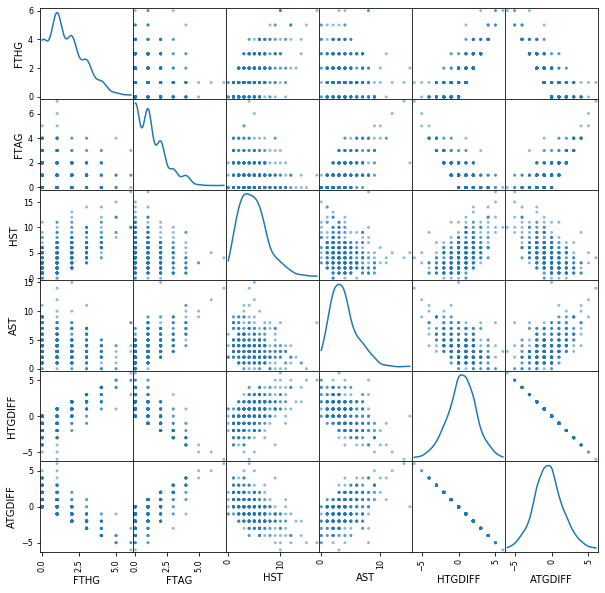

In [21]:
scatter_matrix(df_all_seasons_principles[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST', 'HTGDIFF', 'ATGDIFF']], diagonal='kde', figsize=(10,10));

In [23]:
df_all_seasons_principles[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST', 'HTGDIFF', 'ATGDIFF']].describe()

,FTHG,FTAG,HST,AST,HTGDIFF,ATGDIFF
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,1.589202,1.152582,4.800469,3.814554,0.436620,-0.436620
std,1.309791,1.195169,2.775540,2.324473,1.896615,1.896615
min,0.000000,0.000000,0.000000,0.000000,-6.000000,-6.000000
25%,1.000000,0.000000,3.000000,2.000000,-1.000000,-2.000000
50%,1.000000,1.000000,4.000000,3.000000,0.000000,0.000000
75%,2.000000,2.000000,6.000000,5.000000,2.000000,1.000000
max,6.000000,7.000000,17.000000,15.000000,6.000000,6.000000


In [24]:
#pickle allows use of this file in other programs with ease.

import pickle
df_all_seasons_principles.to_pickle('df_all_seasons_principles')